# Deep Feedforward Networks: Practical Implementation
**Authors:** Iheb Marouani & Zuzanna Bojarska  
**Seminar:** Deep Learning Concepts, University of Osnabrück (2024/2025)  
**Chapter Focus:** Deep Feedforward Networks
---

## 1. Setup: Import Libraries and Configure the Environment
We start by importing the required libraries and setting up our environment. PyTorch will be used to define and train our model, and we will use CUDA if it is available.


In [36]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from model.ffn import FeedForwardNetwork  # Import the model from the model directory
from utils.data_preparation import prepare_data  # Import the data preparation function

# Configure the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


Using device: cpu


## 2. Data Preparation
We prepare the CIFAR-10 dataset by normalizing it and loading it into DataLoader objects for efficient batch processing during training and testing.

In [37]:
trainloader, testloader, classes = prepare_data()


Files already downloaded and verified
Files already downloaded and verified


## 3. Model Architecture
We define a simple feedforward network with three fully connected layers and ReLU activations. The model is designed based on concepts from Chapter 6.

In [38]:
# Initialize the feedforward network and move it to the configured device
model = FeedForwardNetwork().to(device)  # Model from model/ffn.py
print(model)


FeedForwardNetwork(
  (fc1): Linear(in_features=3072, out_features=1024, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
)


## 4. Loss Function and Optimizer
We use cross-entropy loss for our classification problem and SGD (stochastic gradient descent) as the optimizer to update the model's parameters.

In [39]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Standard loss function for classification
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Using SGD with a learning rate of 0.01


## 5. Training the Model
We train the model over multiple epochs. Each iteration consists of a forward pass, loss calculation, backward pass, and parameter update.


In [40]:
num_epochs = 5  # You can adjust the number of epochs as needed

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if i % 100 == 99:  # Print every 100 mini-batches
            print(f"[{epoch + 1}, {i + 1}] loss: {running_loss / 100:.3f}")
            running_loss = 0.0

print("Finished Training")


[1, 100] loss: 2.265
[1, 200] loss: 2.183
[1, 300] loss: 2.088
[1, 400] loss: 2.018
[1, 500] loss: 1.946
[1, 600] loss: 1.901
[1, 700] loss: 1.885
[1, 800] loss: 1.830
[1, 900] loss: 1.833
[1, 1000] loss: 1.795
[1, 1100] loss: 1.750
[1, 1200] loss: 1.769
[1, 1300] loss: 1.733
[1, 1400] loss: 1.696
[1, 1500] loss: 1.703
[2, 100] loss: 1.666
[2, 200] loss: 1.641
[2, 300] loss: 1.642
[2, 400] loss: 1.650
[2, 500] loss: 1.607
[2, 600] loss: 1.586
[2, 700] loss: 1.593
[2, 800] loss: 1.595
[2, 900] loss: 1.604
[2, 1000] loss: 1.578
[2, 1100] loss: 1.595
[2, 1200] loss: 1.588
[2, 1300] loss: 1.553
[2, 1400] loss: 1.553
[2, 1500] loss: 1.551
[3, 100] loss: 1.487
[3, 200] loss: 1.514
[3, 300] loss: 1.495
[3, 400] loss: 1.492
[3, 500] loss: 1.488
[3, 600] loss: 1.489
[3, 700] loss: 1.488
[3, 800] loss: 1.500
[3, 900] loss: 1.482
[3, 1000] loss: 1.492
[3, 1100] loss: 1.471
[3, 1200] loss: 1.468
[3, 1300] loss: 1.470
[3, 1400] loss: 1.484
[3, 1500] loss: 1.424
[4, 100] loss: 1.417
[4, 200] loss: 1

In [41]:
torch.save(model.state_dict(), "feedforward_net.pth")


## 6. Evaluating the Model
We evaluate the trained model on the test set to measure its accuracy.

In [28]:
# Evaluate the model on the test set
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0

with torch.no_grad():  # Disable gradient calculation for inference
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Accuracy on the 10,000 test images: {accuracy:.2f}%")


Accuracy on the 10,000 test images: 9.91%


## 7. Visualizing Training Loss
We visualize how the training loss decreases over epochs to get an idea of how well the model is learning.

In [31]:
import matplotlib.pyplot as plt

# Plot training loss
plt.plot(range(1, num_epochs + 1), train_loss_values, marker='o')
plt.title("Training Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

NameError: name 'train_loss_values' is not defined

## 8. Exploring Weights and Activations
We visualize the distribution of weights in the model and analyze how activations change.

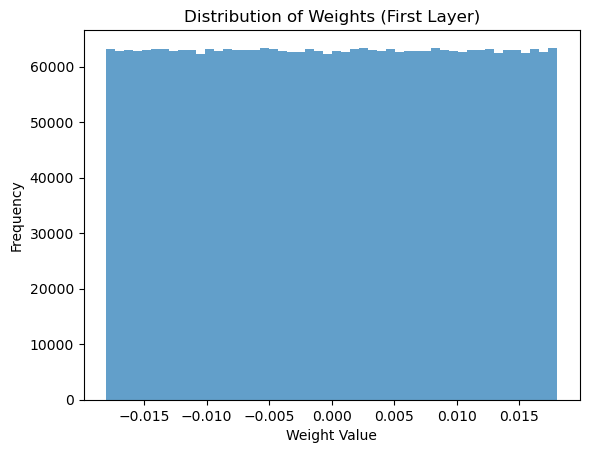

In [33]:
# Example: Visualize the distribution of weights in the first fully connected layer
weights = model.fc1.weight.data.cpu().numpy()
plt.hist(weights.flatten(), bins=50, alpha=0.7)
plt.title("Distribution of Weights (First Layer)")
plt.xlabel("Weight Value")
plt.ylabel("Frequency")
plt.show()

## Ideas to expand up on: 
1. Activations Across Layers
What to Visualize: Plot histograms or scatter plots of neuron activations for each layer, especially after applying the ReLU activation function.
Why It's Cool: It shows how the network transforms data layer by layer and highlights issues like dead neurons (when ReLU outputs are zero).
2. Weight Distributions
What to Visualize: Histograms of the weight values for each layer at different training epochs.
Why It's Cool: You can see how weights evolve during training and whether they become too large or small. It helps understand weight initialization and its effect on learning.
3. Gradient Flow
What to Visualize: Histograms or line plots of gradient values during backpropagation for each layer.
Why It's Cool: This visualization can reveal if you have problems like vanishing or exploding gradients, which are crucial for understanding why deeper networks may fail to train.
4. Loss Landscape
What to Visualize: A 3D plot of the loss surface around the current parameters. This is more advanced but very insightful.
Why It's Cool: It helps understand how "bumpy" or "smooth" the optimization landscape is, which can affect convergence and optimization stability.
5. Decision Boundaries (for Simpler Data)
What to Visualize: If using a simpler 2D dataset (like circles or moons), plot the decision boundaries learned by the network.
Why It's Cool: You can see how the MLP adjusts its boundaries as it learns, illustrating how non-linearity helps the model capture complex patterns.
6. Feature Space Using t-SNE or PCA
What to Visualize: Use dimensionality reduction to project the features from the penultimate layer into 2D space and plot them with different colors for each class.
Why It's Cool: This shows how well the network separates the data into clusters before making the final classification.
7. Class-wise Performance
What to Visualize: A bar chart showing the accuracy for each class in the dataset.
Why It's Cool: It highlights which classes are easier or harder for the model to learn, offering insights into class imbalance or feature complexity.
8. Effect of Hyperparameters
What to Play With: Experiment with learning rates, number of hidden units, and number of layers.
Why It's Cool: Visualizing the impact on the loss curve and training dynamics helps build an intuitive understanding of how hyperparameters affect learning.
9. Training Dynamics: Loss and Accuracy
What to Visualize: Plot the loss and accuracy curves for both training and validation sets.
Why It's Cool: It helps diagnose overfitting or underfitting by showing if the model learns well on the training data but struggles on validation data.
10. Neuron "Dead Zones" (for ReLU)
What to Visualize: Show which neurons in ReLU layers are consistently inactive (output zero).
Why It's Cool: Understanding dead neurons helps explain why certain architectures might not be learning effectively and may need architectural changes.
